# IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import pickle
import scipy
import statistics
import matplotlib.pyplot as plt

from scipy.stats import bootstrap

# USING PANDAS TO IMPORT SWITCH SCANNER METRICS

In [2]:
# Defining the pathway to the switch scanner metrics.
# path_switchscan_metrics = '../SourceData/switch_scanning_spelling_metrics.xlsx'
path_switchscan_metrics = '../SourceData/switch_scanning_spelling_metrics.xlsx'

# Show maximum columns
pd.set_option('display.max_columns', None)

# Importing the excel sheets for 4 vote and 7 vote thresholds.
df_4thr_1000ms = pd.read_excel(path_switchscan_metrics, '4_votes')
df_7thr_1000ms = pd.read_excel(path_switchscan_metrics, '7_votes')

# Extracting only the summary rows for each day.
df_4thr_summary = df_4thr_1000ms.loc[df_4thr_1000ms['Date'].str.contains('Total'),:]
df_7thr_summary = df_7thr_1000ms.loc[df_7thr_1000ms['Date'].str.contains('Total'),:]

# Remove the "_Total" suffix from each date.
df_4thr_summary['Date'] = df_4thr_summary['Date'].str.replace('_Total', '')
df_7thr_summary['Date'] = df_7thr_summary['Date'].str.replace('_Total', '')


/tmp/ipykernel_132287/3352473393.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4thr_summary['Date'] = df_4thr_summary['Date'].str.replace('_Total', '')
/tmp/ipykernel_132287/3352473393.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_7thr_summary['Date'] = df_7thr_summary['Date'].str.replace('_Total', '')


# REORGANIZING SUMMARY METRICS INTO DICTIONARIES

In [3]:

# Extracting the dates from each dataframe.
dates_4thr = df_4thr_summary['Date'].tolist()
dates_7thr = df_7thr_summary['Date'].tolist()

# Initializing the dictionaries for the summary metrics for the 4 vote and 7 vote parameter.
summary_stats_7thr = {}
summary_stats_4thr = {}

# Iterating across all dates using the 4/7 vote voting threshold.
for date in dates_4thr:
        
    # Extracting the sub-dataframe for the current date.
    this_date_df = df_4thr_summary.loc[df_4thr_summary['Date'] == date]       
        
    # Initializing and populating the dictionary for the current date.
    this_date_dict = {}
    this_date_dict['sensitivity_mean']      = this_date_df['Sensitivity (%)']
    this_date_dict['ccpm']                  = this_date_df['Correct CPM']
    this_date_dict['wcpm']                  = this_date_df['Wrong CPM']
    this_date_dict['cwpm']                  = this_date_df['Correct WPM']
    this_date_dict['days_post_training']    = this_date_df['Days Post-Training']
    this_date_dict['fpf_hr']                = this_date_df['FPF ( /hr)']
    this_date_dict['fpf_min']               = this_date_df['FPF ( /min)']
    this_date_dict['mean_latency_BCI2000']  = this_date_df['Mean Latency to BCI2000 (s)']
    this_date_dict['mean_latency_UI']       = this_date_df['Mean Latency to UI (s)']
    this_date_dict['n_detections']          = this_date_df['N Detections']
    this_date_dict['n_grasps']              = this_date_df['N Grasps']
    this_date_dict['stdev_latency_BCI2000'] = this_date_df['Stdev Latency to BCI2000 (s)']
    this_date_dict['stdev_latency_UI']      = this_date_df['Stdev Latency to UI (s)']
    this_date_dict['total_time']            = this_date_df['Block Time (s)']
    this_date_dict['tpf_hr']                = this_date_df['TPF ( /hr)']
    this_date_dict['tpf_min']               = this_date_df['TPF ( /min)']
    
    # Populating the Summary Stats dictionary with the current date's information.
    summary_stats_4thr[date] = this_date_dict
    
    
# Iterating across all dates using the 7/7 vote voting threshold.
for date in dates_7thr:
        
    # Extracting the sub-dataframe for the current date.
    this_date_df = df_7thr_summary.loc[df_7thr_summary['Date'] == date]       
        
    # Initializing and populating the dictionary for the current date.
    this_date_dict = {}
    this_date_dict['sensitivity_mean']      = this_date_df['Sensitivity (%)']
    this_date_dict['ccpm']                  = this_date_df['Correct CPM']
    this_date_dict['wcpm']                  = this_date_df['Wrong CPM']
    this_date_dict['cwpm']                  = this_date_df['Correct WPM']
    this_date_dict['days_post_training']    = this_date_df['Days Post-Training']
    this_date_dict['fpf_hr']                = this_date_df['FPF ( /hr)']
    this_date_dict['fpf_min']               = this_date_df['FPF ( /min)']
    this_date_dict['mean_latency_BCI2000']  = this_date_df['Mean Latency to BCI2000 (s)']
    this_date_dict['mean_latency_UI']       = this_date_df['Mean Latency to UI (s)']
    this_date_dict['n_detections']          = this_date_df['N Detections']
    this_date_dict['n_grasps']              = this_date_df['N Grasps']
    this_date_dict['stdev_latency_BCI2000'] = this_date_df['Stdev Latency to BCI2000 (s)']
    this_date_dict['stdev_latency_UI']      = this_date_df['Stdev Latency to UI (s)']
    this_date_dict['total_time']            = this_date_df['Block Time (s)']
    this_date_dict['tpf_hr']                = this_date_df['TPF ( /hr)']
    this_date_dict['tpf_min']               = this_date_df['TPF ( /min)']
    
    # Populating the Summary Stats dictionary with the current date's information.
    summary_stats_7thr[date] = this_date_dict


# Creating array for plotting time per block

In [4]:
# Excluding the summary rows.
df_7thr_per_block = df_7thr_1000ms.loc[~df_7thr_1000ms['Date'].str.contains('Total'),:]
df_4thr_per_block = df_4thr_1000ms.loc[~df_4thr_1000ms['Date'].str.contains('Total'),:]

# Extracting only rows relevant to number of hours and blocks per session.
df_7thr_per_block = df_7thr_per_block[['Days Post-Training', 'Block', 'Block Time (s)']]
df_4thr_per_block = df_4thr_per_block[['Days Post-Training', 'Block', 'Block Time (s)']]

# Extracting the block order over multiple sessions.
block_list_7thr = np.asarray(df_7thr_per_block['Block']).astype(float)
block_list_4thr = np.asarray(df_4thr_per_block['Block']).astype(float)

# Extracting the block times across all sessions.
blocktime_list_7thr = np.asarray(df_7thr_per_block['Block Time (s)']).astype(float)/60
blocktime_list_4thr = np.asarray(df_4thr_per_block['Block Time (s)']).astype(float)/60

# For each block day post-final training block.
day_list_7thr = np.asarray(df_7thr_per_block['Days Post-Training']).astype(float)
day_list_4thr = np.asarray(df_4thr_per_block['Days Post-Training']).astype(float)

# Combining block information across sessions using 7-vote and 4-vote thresholds.
blocktime_list_comb = np.concatenate((blocktime_list_7thr, blocktime_list_4thr), axis = 0)
block_list_comb     = np.concatenate((block_list_7thr, block_list_4thr), axis = 0)
day_list_comb       = np.concatenate((day_list_7thr, day_list_4thr), axis = 0)

# Adding data from communication board usage (10/14/2023): 11 min, 23 sec = 683 sec
blocktime_list_comb = np.concatenate((np.array([683])/60 , blocktime_list_comb), axis=0)
block_list_comb     = np.concatenate((np.array([1]), block_list_comb), axis = 0)
day_list_comb       = np.concatenate((np.array([21]), day_list_comb), axis = 0)

# Adding data from training days. Already in minutes
training_blocktimes = np.array([3.773, 3.844, 3.724, 14.091, 9.072, 9.425])
training_blocks     = np.array([1, 1, 2, 1, 1, 2])
training_days       = np.array([-15,-14,-14,-1,0,0])
blocktime_list_comb = np.concatenate((training_blocktimes , blocktime_list_comb), axis=0)
block_list_comb     = np.concatenate((training_blocks, block_list_comb), axis = 0)
day_list_comb       = np.concatenate((training_days, day_list_comb), axis = 0)

# Computing unique days.
unique_days   = np.unique(day_list_comb).astype(int)
n_unique_days = unique_days.shape[0]

# Initializing the array which will hold block times over all sessions.
n_max_blocks = int(max(block_list_comb))
block_array  = np.zeros((n_unique_days, n_max_blocks))

# Iterating across all days.
for n, day in enumerate(unique_days):
    col = 0
    day_inds = np.argwhere(day_list_comb == day) 
    for day_ind in day_inds:
        day_ind = day_ind[0]
        block_array[n, col] = blocktime_list_comb[day_ind]
        col += 1
block_array = block_array.transpose()

# Plotting Figure 2

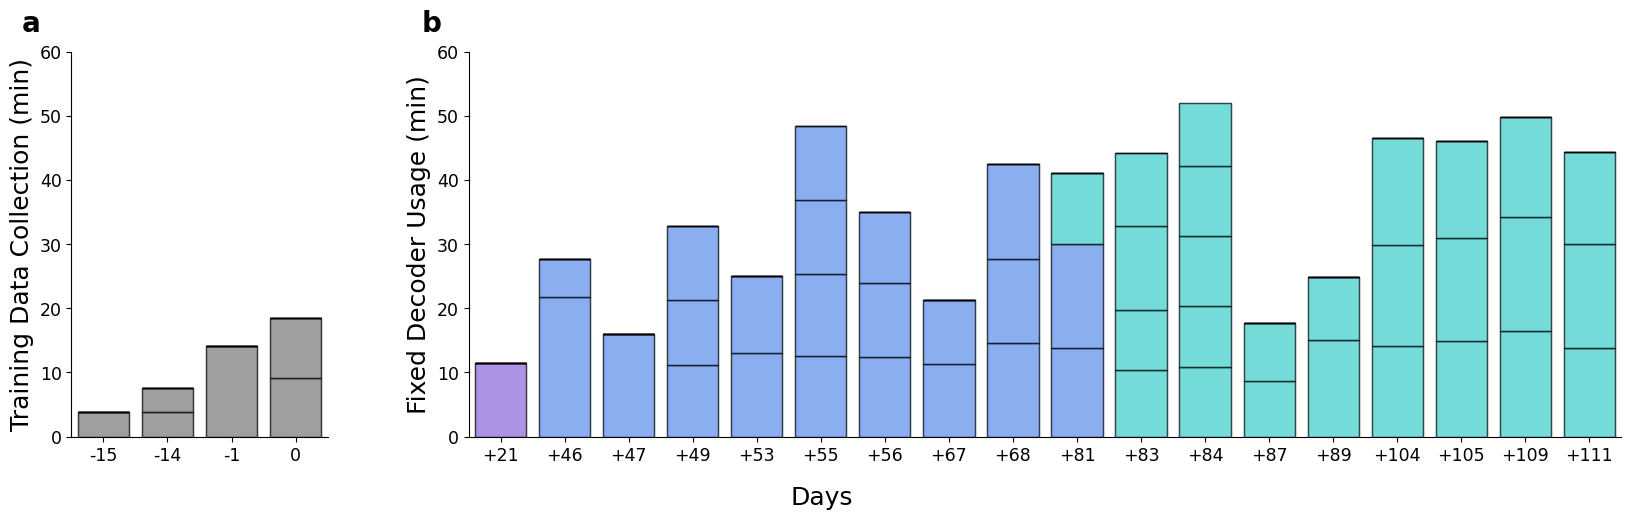

In [5]:
# EXPERIMNETER INPUTS:
color_trianing  = 'grey'
color_commboard = 'mediumpurple'
color_7thr      = 'cornflowerblue'
color_4thr      = 'mediumturquoise'
color_lowperf   = 'lightcoral'
save_fig        = True

# Initializing figure.
fig1, ax = plt.subplots(1,2, figsize = (20,5), width_ratios=[4,18])

# Bar plot for every day.
for n, day in enumerate(unique_days):

    # Initializing the bar height for the current day.
    this_day_bar_value = 0
    
    # Multiple bars for each day.
    for b in range(block_array.shape[0]):
        if (b+1 == 1) and (day == -15):
            my_color = color_trianing
            axis = 0
        if (b+1 == 1) and (day == 21):
            my_color = color_commboard
            axis = 1
        if (b+1 == 1) and (day == 46):
            my_color = color_7thr
        if (b+1 == 3) and (day == 81):
            my_color = color_4thr
        if (b+1 == 1) and (day == 118):
            my_color = color_lowperf
        
        this_new_value = block_array[b,n]
        ax[axis].bar(n, this_new_value, bottom = this_day_bar_value, color = my_color, edgecolor='black', zorder = 2, alpha = 0.5)
        ax[axis].bar(n, this_new_value, bottom = this_day_bar_value, color = my_color, edgecolor='black', zorder = 2, alpha = 0.5)
        
        # Icreasing
        this_day_bar_value += this_new_value

        
ax[0].set_yticks(np.arange(0,70,10))  
ax[0].set_ylabel('Training Data Collection (min)', fontsize=18)
ax[0].spines[['right','top']].set_visible(False)
ax[0].set_xticks(np.arange(n_unique_days));
ax[0].set_xlim([-0.5,3.5])

ax[1].set_yticks(np.arange(0,70,10))      
ax[1].set_ylabel('Fixed Decoder Usage (min)', fontsize=18)
ax[1].spines[['right','top']].set_visible(False)

ax[1].set_xticks(np.arange(n_unique_days));
ax[1].set_xlim([3.50,21.5])

unique_days_str = unique_days.astype(str)
for n, day_str in enumerate(unique_days_str[4:]):
    unique_days_str[4+n] = '+' + day_str 
    
ax[0].set_xticklabels(unique_days_str, fontsize=12.5);
ax[1].set_xticklabels(unique_days_str, fontsize=12.5);
ax[0].set_yticklabels(np.arange(0,70,10).astype(str), fontsize=12.5);
ax[1].set_yticklabels(np.arange(0,70,10).astype(str), fontsize=12.5);

fig1.text(0.5, -0.025, 'Days', ha='center', fontsize=18)

# Subfigure labels.
fig1.text(0.1, 0.92, 
         'a', 
         style = 'normal',
         fontsize = 20,
         color = "black",
         weight='bold')
fig1.text(0.30, 0.92, 
         'b', 
         style = 'normal',
         fontsize = 20,
         color = "black",
         weight='bold')

# Saving Figures. 
if save_fig:
    # fig1.savefig('LongTermUseFigure.jpg', bbox_inches = 'tight', dpi=1000)
    # fig1.savefig('LongTermUseFigure.svg', format = 'svg', bbox_inches='tight', dpi = 2000)
    fig1.savefig('Figure02_LongTermUse.pdf', format = 'pdf', bbox_inches='tight', dpi = 1000)

# Plotting Figure 4

In [6]:

def extracting_latencies(date_block_dict, dir_base, folder, movement):
    """
    DESCRIPTION:
    Extracting all the latencies from the experimenter-input blocks into one array.
    
    INPUT VARIABLES:
    date_block_dict: [dictionary (keys: strings (dates); values: list > ints (blocks)]; Dictionary of dates and blocks corresponding to each date. 
    dir_base:        [string]; Base directory where all information for this subject and task (Speller) is found.
    movement:        [string]; The movement from which the onsets and offsets will be extracted.

    OUTPUT VARIABLES:
    latencies_arr: [array > floats (units: s)]; Array of latencies from all experimenter-input blocks.
    """

    # COMPUTATION:
    
    # Initializing the list of latencies.
    list_of_latencies = []

    # Iterating across all dates. 
    for date in date_block_dict.keys():

        # Extracting the block list from dictionary.
        block_list = date_block_dict[date]

        # Iterating across all blocks from the current block list.
        for block in block_list:

            # Creating the pathway for the .txt file where the starting and ending times of the current block are stored.
            this_directory       = dir_base + date + '/' + folder + '/'
            this_filename        = date + '_' + 'click_latencies'
            path_click_latencies = this_directory + this_filename

            # Read in the dictionary from the pathway.
            with open(path_click_latencies, "rb") as fp:   
                dict_click_latencies = pickle.load(fp)

            # Extracting the click latencies from the dictionary.
            t_click_latencies = dict_click_latencies[movement]['block'+str(block)]

            # Adding the array of click latencies to the list.
            list_of_latencies.append(t_click_latencies)

    # Concatenating the arrays from the list into one array.
    latencies_arr = np.hstack(list_of_latencies)
    
    return latencies_arr


Sensitivity:
Median Sensitivity (7-vote threshold):  94.9685534591195
Median Sensitivity (4-vote threshold):  97.80405405405406



TPF and FPF:
Median TPF (7-vote threshold):  10.671855748549406
Median FPF (7-vote threshold):  0.028537156805017977
Median TPF (4-vote threshold):  11.596727748543156
Median FPF (4-vote threshold):  0.10053700163808289



Median BCI2000 Latency across session means (7-vote threshold): 0.75
Median UI Latency across session means (7-vote threshold): 0.899
Median BCI2000 Latency across session means (4-vote threshold): 0.475
Median UI Latency across session means (4-vote threshold): 0.682



CCPM and WCPM:
Median CCPM (7-vote threshold):  9.07048843925958
Median WCPM (7-vote threshold):  0.18846544368299173
Median CCPM (4-vote threshold):  10.195902401487706
Median WCPM (4-vote threshold):  0.11314115679290077



CWPM:
Median CWPM (7-vote threshold):  1.8549151923261684
Median CWPM (4-vote threshold):  2.1353682388021418





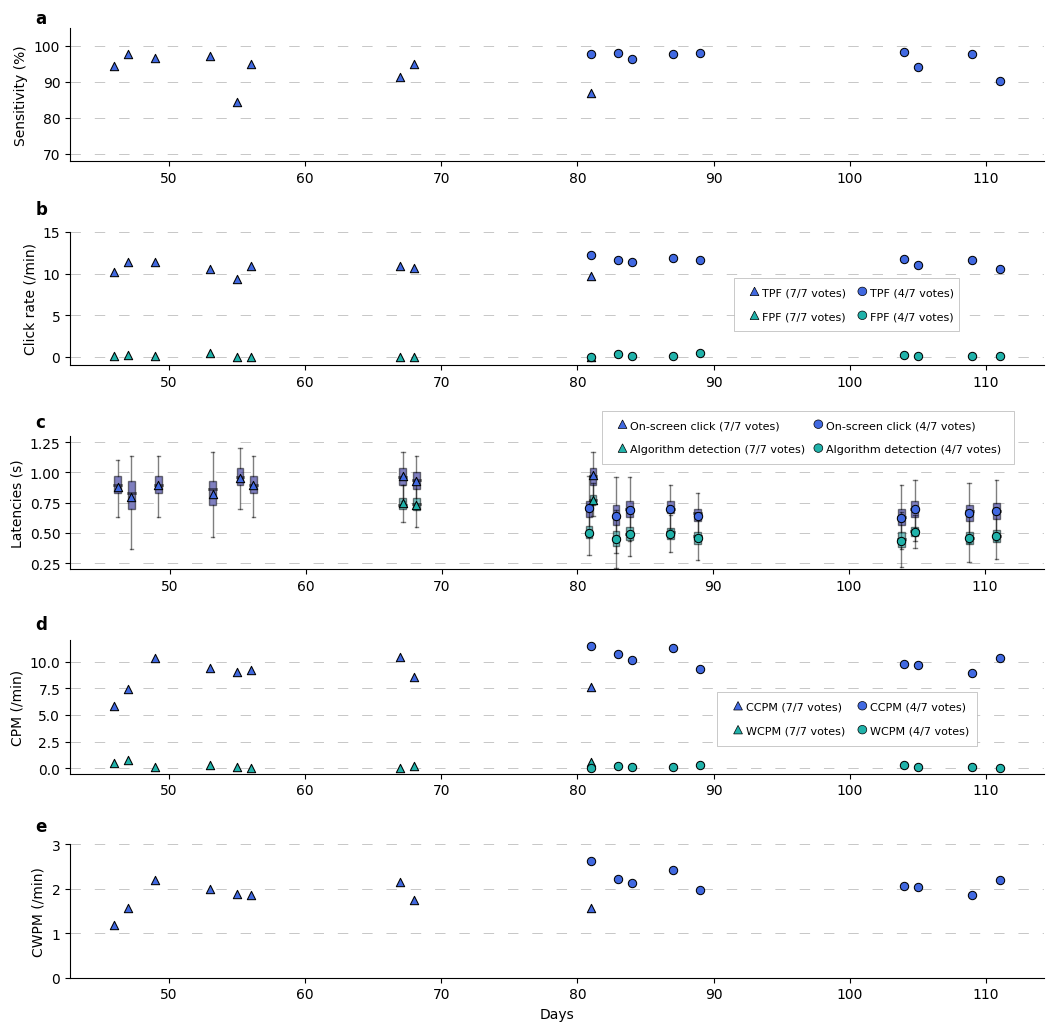

In [7]:

# EXPERIMENTER INPUTS:
color1a   = 'navy' # blue
color1b   = 'royalblue' #cornflowerblue
color2a   = 'darkcyan' # green
color2b   = 'lightseagreen' # lightgreen
marker1   = 'o'
marker2   = '^'
save_figs = True


# Extracting performance metrics for plotting.
days_post_training_7thr  = np.asarray(df_7thr_summary['Days Post-Training']).astype(float)
tpf_7thr                 = np.asarray(df_7thr_summary['TPF ( /min)']).astype(float)
fpf_7thr                 = np.asarray(df_7thr_summary['FPF ( /min)']).astype(float)
sensitivity_mean_7thr    = np.asarray(df_7thr_summary['Sensitivity (%)']).astype(float)
mean_latency_BCI2K_7thr  = np.asarray(df_7thr_summary['Mean Latency to BCI2000 (s)'].values[6:]).astype(float)
mean_latency_UI_7thr     = np.asarray(df_7thr_summary['Mean Latency to UI (s)'].values).astype(float)
stdev_latency_BCI2K_7thr = np.asarray(df_7thr_summary['Stdev Latency to BCI2000 (s)'].values[6:]).astype(float)
stdev_latency_UI_7thr    = np.asarray(df_7thr_summary['Stdev Latency to UI (s)'].values).astype(float)
ccpm_7thr                = np.asarray(df_7thr_summary['Correct CPM']).astype(float)
wcpm_7thr                = np.asarray(df_7thr_summary['Wrong CPM']).astype(float)
cwpm_7thr                = np.asarray(df_7thr_summary['Correct WPM']).astype(float)

days_post_training_4thr  = np.asarray(df_4thr_summary['Days Post-Training']).astype(float)
tpf_4thr                 = np.asarray(df_4thr_summary['TPF ( /min)']).astype(float)
fpf_4thr                 = np.asarray(df_4thr_summary['FPF ( /min)']).astype(float)
sensitivity_mean_4thr    = np.asarray(df_4thr_summary['Sensitivity (%)']).astype(float)
mean_latency_BCI2K_4thr  = np.asarray(df_4thr_summary['Mean Latency to BCI2000 (s)'].values).astype(float)
mean_latency_UI_4thr     = np.asarray(df_4thr_summary['Mean Latency to UI (s)'].values).astype(float)
stdev_latency_BCI2K_4thr = np.asarray(df_4thr_summary['Stdev Latency to BCI2000 (s)'].values).astype(float)
stdev_latency_UI_4thr    = np.asarray(df_4thr_summary['Stdev Latency to UI (s)'].values).astype(float)
ccpm_4thr                = np.asarray(df_4thr_summary['Correct CPM']).astype(float)
wcpm_4thr                = np.asarray(df_4thr_summary['Wrong CPM']).astype(float)
cwpm_4thr                = np.asarray(df_4thr_summary['Correct WPM']).astype(float)


# Initializing figure.
fig, ax = plt.subplots(5,1, figsize=(11,10.625))
fig.tight_layout(pad=3)

# ROW 1: SENSITIVITY
ax[0].grid(axis='y', linestyle='dashed', dashes=(15, 20), linewidth=0.5)
ax[0].scatter(days_post_training_7thr, sensitivity_mean_7thr, color = color1b, edgecolors='black', linewidths=0.75, marker=marker2, zorder=2)
ax[0].scatter(days_post_training_4thr, sensitivity_mean_4thr, color = color1b, edgecolors='black', linewidths=0.75, marker=marker1, zorder=2)
ax[0].set_yticks(np.arange(70,101,10)) 
ax[0].set_ylim([68, 105])
ax[0].set_ylabel('Sensitivity (%)')
ax[0].spines[['right', 'top']].set_visible(False)
ax[0].yaxis.label.set_color('k') 
ax[0].tick_params(axis='y', colors='k')
ax[0].spines['left'].set_color('k') 
print('Sensitivity:')
print('Median Sensitivity (7-vote threshold): ', statistics.median(sensitivity_mean_7thr))
print('Median Sensitivity (4-vote threshold): ', statistics.median(sensitivity_mean_4thr))
print('\n\n')


# ROW 2: TPF and FPF
ax[1].grid(axis='y', linestyle='dashed', dashes=(15, 20), linewidth=0.5)
ax[1].scatter(days_post_training_7thr, tpf_7thr, color = color1b, edgecolors='black', linewidths=0.75, marker=marker2, zorder=2)
ax[1].scatter(days_post_training_4thr, tpf_4thr, color = color1b, edgecolors='black', linewidths=0.75, marker=marker1, zorder=2)
ax[1].scatter(days_post_training_7thr, fpf_7thr, color = color2b, edgecolors='black', linewidths=0.75, marker=marker2, zorder=2)
ax[1].scatter(days_post_training_4thr, fpf_4thr, color = color2b, edgecolors='black', linewidths=0.75, marker=marker1, zorder=2)
ax[1].set_ylabel('Click rate (/min)')
ax[1].set_yticks(np.array([0,5, 10, 15])) 
ax[1].set_ylim([-1, 15])
ax[1].spines[['top', 'right']].set_visible(False)
print('TPF and FPF:')
print('Median TPF (7-vote threshold): ', statistics.median(tpf_7thr))
print('Median FPF (7-vote threshold): ', statistics.median(fpf_7thr))
print('Median TPF (4-vote threshold): ', statistics.median(tpf_4thr))
print('Median FPF (4-vote threshold): ', statistics.median(fpf_4thr))
print('\n\n')








shift = 0.15

dir_base = '../SourceData/ClickLatencies/'



# Creating lists of BCI2000 and UI latencies to plot as box and whisker plots for the 7-vote threshold.
latencies_bci2k_7thr = []
latencies_ui_7thr = []
for n, this_date in enumerate(df_7thr_summary['Date']):
  
    # Counting the number of blocks that occurred on the specific date.
    n_blocks_this_date = df_7thr_1000ms['Date'].value_counts()[this_date]

    # Initializing and populating the dictionary that will hold the date and block numbers.
    date_block_dict = {}
    if this_date == '2022_12_13':
        date_block_dict[this_date] = np.array([1,2])
    else:
        date_block_dict[this_date] = np.arange(1,n_blocks_this_date+1)

    # Extracitng the BCI2000 and UI latencies for the current date.
    if n > 5: # THIS NUMBER WILL EVENTUALLY BE n > 5
        this_date_7thr_latencies_bci2k = extracting_latencies(date_block_dict, dir_base, 'BCI2000', 'grasp')
    this_date_7thr_latencies_ui = extracting_latencies(date_block_dict, dir_base, 'UI', 'grasp')

    # Appending the list of latencies to the corresponding lists.
    if n > 5:
        latencies_bci2k_7thr.append(this_date_7thr_latencies_bci2k)
    latencies_ui_7thr.append(this_date_7thr_latencies_ui)
    
# Creating lists of BCI2000 and UI latencies to plot as box and whisker plots for the 4-vote threshold.
latencies_bci2k_4thr = []
latencies_ui_4thr = []
for this_date in df_4thr_summary['Date']:
    
    # Counting the number of blocks that occurred on the specific date.
    n_blocks_this_date = df_4thr_1000ms['Date'].value_counts()[this_date]
    
    # Initializing and populating the dictionary that will hold the date and block numbers.
    date_block_dict = {}
    if this_date == '2022_12_13':
        date_block_dict[this_date] = np.array([3])
    else:
        date_block_dict[this_date] = np.arange(1,n_blocks_this_date+1)
    
    # Extracitng the BCI2000 and UI latencies for the current date.
    this_date_4thr_latencies_bci2k = extracting_latencies(date_block_dict, dir_base, 'BCI2000', 'grasp')
    this_date_4thr_latencies_ui = extracting_latencies(date_block_dict, dir_base, 'UI', 'grasp')
    
    # Appending the list of latencies to the corresponding lists.
    latencies_bci2k_4thr.append(this_date_4thr_latencies_bci2k)
    latencies_ui_4thr.append(this_date_4thr_latencies_ui)
    
    


# ROW 3: BCI2000 AND UI LATENCIES
ax[2].grid(axis='y', linestyle='dashed', dashes=(15, 20), linewidth=0.5)


# UI
ax[2].boxplot(latencies_ui_7thr,\
              showfliers=False, positions=days_post_training_7thr+shift, manage_ticks=False, widths=0.5, patch_artist=True,\
              boxprops=dict(facecolor=color1a, color='black', alpha = 0.5),\
              capprops=dict(color='black', alpha = 0.5),\
              whiskerprops=dict(color='black', alpha = 0.5),\
              medianprops=dict(color='black', linewidth=2.0, alpha = 0.5))
ax[2].scatter(days_post_training_7thr+shift, mean_latency_UI_7thr, color = color1b, edgecolors='black', marker=marker2, linewidths=0.75, zorder=3)

ax[2].boxplot(latencies_ui_4thr,\
              showfliers=False, positions=days_post_training_4thr-shift, manage_ticks=False, widths=0.5, patch_artist=True,\
              boxprops=dict(facecolor=color1a, color='black', alpha = 0.5),\
              capprops=dict(color='black', alpha = 0.5),\
              whiskerprops=dict(color='black', alpha = 0.5),\
              medianprops=dict(color='black', linewidth=2.0, alpha = 0.5))
ax[2].scatter(days_post_training_4thr-shift, mean_latency_UI_4thr, color = color1b, edgecolors='black', marker=marker1, linewidths=0.75, zorder=3)




# BCI2000

ax[2].boxplot(latencies_bci2k_7thr,\
              showfliers=False, positions=days_post_training_7thr[6:]+shift, manage_ticks=False, widths=0.5, patch_artist=True,\
              boxprops=dict(facecolor=color2a, color='black', alpha = 0.5),\
              capprops=dict(color='black', alpha = 0.5),\
              whiskerprops=dict(color='black', alpha = 0.5),\
              medianprops=dict(color='black', linewidth=2.0, alpha = 0.5))
ax[2].scatter(days_post_training_7thr[6:]+shift, mean_latency_BCI2K_7thr, color = color2b, edgecolors='black', marker=marker2, linewidths=0.75, zorder=3)

ax[2].boxplot(latencies_bci2k_4thr,\
              showfliers=False, positions=days_post_training_4thr-shift, manage_ticks=False, widths=0.5, patch_artist=True,\
              boxprops=dict(facecolor=color2a, color='black', alpha = 0.5),\
              capprops=dict(color='black', alpha = 0.5),\
              whiskerprops=dict(color='black', alpha = 0.5),\
              medianprops=dict(color='black', linewidth=2.0, alpha = 0.5))
ax[2].scatter(days_post_training_4thr-shift, mean_latency_BCI2K_4thr, color = color2b, edgecolors='black', marker=marker1, linewidths=0.75, zorder=3)

ax[2].set_ylabel('Latencies (s)')
ax[2].set_yticks(np.array([0.25, 0.5, 0.75, 1, 1.25])) 
ax[2].set_ylim([0.20, 1.3])
ax[2].tick_params(axis='y', colors='k')
ax[2].spines[['top','right']].set_visible(False)
ax[2].yaxis.label.set_color('k') 
print('Median BCI2000 Latency across session means (7-vote threshold):', statistics.median(mean_latency_BCI2K_7thr))
print('Median UI Latency across session means (7-vote threshold):', statistics.median(mean_latency_UI_7thr))
print('Median BCI2000 Latency across session means (4-vote threshold):', statistics.median(mean_latency_BCI2K_4thr))
print('Median UI Latency across session means (4-vote threshold):', statistics.median(mean_latency_UI_4thr))
print('\n\n')

# ROW 4: CCPM and WCPM (Correct and Wrong character per min)
ax[3].grid(axis='y', linestyle='dashed', dashes=(15, 20), linewidth=0.5)
ax[3].scatter(days_post_training_7thr, ccpm_7thr, color = color1b, edgecolors='black', linewidths=0.75, marker=marker2, zorder=2)
ax[3].scatter(days_post_training_4thr, ccpm_4thr, color = color1b, edgecolors='black', linewidths=0.75, marker=marker1, zorder=2)
ax[3].scatter(days_post_training_7thr, wcpm_7thr, color = color2b, edgecolors='black', linewidths=0.75, marker=marker2, zorder=2)
ax[3].scatter(days_post_training_4thr, wcpm_4thr, color = color2b, edgecolors='black', linewidths=0.75, marker=marker1, zorder=2)
ax[3].set_ylabel('CPM (/min)')
ax[3].set_yticks(np.arange(0,15,2.5)) 
ax[3].set_ylim([-0.5, 12])
ax[3].spines[['top', 'right']].set_visible(False)
print('CCPM and WCPM:')
print('Median CCPM (7-vote threshold): ', statistics.median(ccpm_7thr))
print('Median WCPM (7-vote threshold): ', statistics.median(wcpm_7thr))
print('Median CCPM (4-vote threshold): ', statistics.median(ccpm_4thr))
print('Median WCPM (4-vote threshold): ', statistics.median(wcpm_4thr))
print('\n\n')


# ROW 5: CWPM (Correct words per min)
ax[4].grid(axis='y', linestyle='dashed', dashes=(15, 20), linewidth=0.5)
ax[4].scatter(days_post_training_7thr, cwpm_7thr, color = color1b, edgecolors='black', linewidths=0.75, marker=marker2, zorder=2)
ax[4].scatter(days_post_training_4thr, cwpm_4thr, color = color1b, edgecolors='black', linewidths=0.75, marker=marker1, zorder=2)
ax[4].set_ylabel('CWPM (/min)')
ax[4].set_yticks(np.arange(0,3.1,1)) 
ax[4].set_ylim([0, 3])
ax[4].tick_params(axis='y', colors='k')
ax[4].spines[['top', 'right']].set_visible(False)
ax[4].set_xlabel('Days')
print('CWPM:')
print('Median CWPM (7-vote threshold): ', statistics.median(cwpm_7thr))
print('Median CWPM (4-vote threshold): ', statistics.median(cwpm_4thr))
print('\n\n')



# Subfigure labels.
fig.text(0.035, 0.96, 
         'a', 
         style = 'normal',
         fontsize = 12,
         color = "black",
         weight = 'bold')
fig.text(0.035, 0.78, 
         'b', 
         style = 'normal',
         fontsize = 12,
         color = "black",
         weight = 'bold')
fig.text(0.035, 0.58, 
         'c', 
         style = 'normal',
         fontsize = 12,
         color = "black",
         weight = 'bold')
fig.text(0.035, 0.39, 
         'd', 
         style = 'normal',
         fontsize = 12,
         color = "black",
         weight = 'bold')
fig.text(0.035, 0.20, 
         'e', 
         style = 'normal',
         fontsize = 12,
         color = "black",
         weight = 'bold')





radius = 0.004
text_sub = 0.004

legendb_origin_x = 0.67
legendb_origin_y = 0.67
legendb_tri_bottomright_x = legendb_origin_x + 0.015
legendb_topcircle_y = legendb_origin_y + 0.0375
legendb_botcircle_y = legendb_origin_y + 0.015
legendb_circles_x = 0.787

legendc_origin_x = 0.55
legendc_origin_y = 0.545
legendc_tri_bottomright_x = legendc_origin_x + 0.015
legendc_topcircle_y = legendc_origin_y + 0.0375
legendc_botcircle_y = legendc_origin_y + 0.015
legendc_circles_x = 0.747

legendd_origin_x = 0.655
legendd_origin_y = 0.28
legendd_tri_bottomright_x = legendd_origin_x + 0.015
legendd_topcircle_y = legendd_origin_y + 0.0375
legendd_botcircle_y = legendd_origin_y + 0.015
legendd_circles_x = 0.787


fig.patches.extend([plt.Rectangle((legendb_origin_x,legendb_origin_y),0.205,0.05, linewidth=0.5, facecolor='white',
                                  edgecolor=[0.7,0.7,0.7], 
                                  fill=True,  alpha=1, zorder=1,
                                  transform=fig.transFigure, figure=fig)])
fig.patches.extend([plt.Circle((legendb_circles_x, legendb_topcircle_y), radius=radius, zorder=2, edgecolor=[0,0,0], 
                               linewidth=0.5, facecolor=color1b,
                               transform=fig.transFigure, figure=fig)])
fig.patches.extend([plt.Polygon(np.array(([legendb_tri_bottomright_x, legendb_tri_bottomright_x+radius, legendb_tri_bottomright_x+2*radius],\
                                          [legendb_topcircle_y-radius, legendb_topcircle_y+radius, legendb_topcircle_y-radius])).transpose(), 
                                linewidth=0.5, facecolor=color1b, edgecolor=[0,0,0],
                                transform=fig.transFigure, figure=fig)])
fig.text(0.794, legendb_topcircle_y-text_sub, 'TPF (4/7 votes)', fontsize = 8)
fig.text(0.696, legendb_topcircle_y-text_sub, 'TPF (7/7 votes)', fontsize = 8)
fig.patches.extend([plt.Circle((legendb_circles_x, legendb_botcircle_y), radius=radius, zorder=2, edgecolor=[0,0,0], 
                               linewidth=0.5, facecolor=color2b,
                               transform=fig.transFigure, figure=fig)])
fig.patches.extend([plt.Polygon(np.array(([legendb_tri_bottomright_x, legendb_tri_bottomright_x+radius, legendb_tri_bottomright_x+2*radius],\
                                          [legendb_botcircle_y-radius, legendb_botcircle_y+radius, legendb_botcircle_y-radius])).transpose(), 
                                linewidth=0.5, facecolor=color2b, edgecolor=[0,0,0],
                                transform=fig.transFigure, figure=fig)])
fig.text(0.794, legendb_botcircle_y-text_sub, 'FPF (4/7 votes)', fontsize = 8)
fig.text(0.696, legendb_botcircle_y-text_sub, 'FPF (7/7 votes)', fontsize = 8)



fig.patches.extend([plt.Rectangle((legendc_origin_x,legendc_origin_y),0.375,0.05, linewidth=0.5, facecolor='white',
                                  edgecolor=[0.7,0.7,0.7], 
                                  fill=True,  alpha=1, zorder=1,
                                  transform=fig.transFigure, figure=fig)])
fig.patches.extend([plt.Circle((legendc_circles_x, legendc_topcircle_y), radius=radius, zorder=2, edgecolor=[0,0,0], 
                               linewidth=0.5, facecolor=color1b,
                               transform=fig.transFigure, figure=fig)])
fig.patches.extend([plt.Polygon(np.array(([legendc_tri_bottomright_x, legendc_tri_bottomright_x+radius, legendc_tri_bottomright_x+2*radius],\
                                          [legendc_topcircle_y-radius, legendc_topcircle_y+radius, legendc_topcircle_y-radius])).transpose(), 
                                linewidth=0.5, facecolor=color1b, edgecolor=[0,0,0],
                                transform=fig.transFigure, figure=fig)])
fig.text(0.754, legendc_topcircle_y-text_sub, 'On-screen click (4/7 votes)', fontsize = 8)
fig.text(0.576, legendc_topcircle_y-text_sub, 'On-screen click (7/7 votes)', fontsize = 8)
fig.patches.extend([plt.Circle((legendc_circles_x, legendc_botcircle_y), radius=radius, zorder=2, edgecolor=[0,0,0], 
                               linewidth=0.5, facecolor=color2b,
                               transform=fig.transFigure, figure=fig)])
fig.patches.extend([plt.Polygon(np.array(([legendc_tri_bottomright_x, legendc_tri_bottomright_x+radius, legendc_tri_bottomright_x+2*radius],\
                                          [legendc_botcircle_y-radius, legendc_botcircle_y+radius, legendc_botcircle_y-radius])).transpose(), 
                                linewidth=0.5, facecolor=color2b, edgecolor=[0,0,0],
                                transform=fig.transFigure, figure=fig)])
fig.text(0.754, legendc_botcircle_y-text_sub, 'Algorithm detection (4/7 votes)', fontsize = 8)
fig.text(0.576, legendc_botcircle_y-text_sub, 'Algorithm detection (7/7 votes)', fontsize = 8)



fig.patches.extend([plt.Rectangle((legendd_origin_x,legendd_origin_y),0.236,0.05, linewidth=0.5, facecolor='white',
                                  edgecolor=[0.7,0.7,0.7], 
                                  fill=True,  alpha=1, zorder=1,
                                  transform=fig.transFigure, figure=fig)])
fig.patches.extend([plt.Circle((legendd_circles_x, legendd_topcircle_y), radius=radius, zorder=2, edgecolor=[0,0,0], 
                               linewidth=0.5, facecolor=color1b,
                               transform=fig.transFigure, figure=fig)])
fig.patches.extend([plt.Polygon(np.array(([legendd_tri_bottomright_x, legendd_tri_bottomright_x+radius, legendd_tri_bottomright_x+2*radius],\
                                          [legendd_topcircle_y-radius, legendd_topcircle_y+radius, legendd_topcircle_y-radius])).transpose(), 
                                linewidth=0.5, facecolor=color1b, edgecolor=[0,0,0],
                                transform=fig.transFigure, figure=fig)])
fig.text(0.794, legendd_topcircle_y-text_sub, 'CCPM (4/7 votes)', fontsize = 8)
fig.text(0.681, legendd_topcircle_y-text_sub, 'CCPM (7/7 votes)', fontsize = 8)
fig.patches.extend([plt.Circle((legendd_circles_x, legendd_botcircle_y), radius=radius, zorder=2, edgecolor=[0,0,0], 
                               linewidth=0.5, facecolor=color2b,
                               transform=fig.transFigure, figure=fig)])
fig.patches.extend([plt.Polygon(np.array(([legendd_tri_bottomright_x, legendd_tri_bottomright_x+radius, legendd_tri_bottomright_x+2*radius],\
                                          [legendd_botcircle_y-radius, legendd_botcircle_y+radius, legendd_botcircle_y-radius])).transpose(), 
                                linewidth=0.5, facecolor=color2b, edgecolor=[0,0,0],
                                transform=fig.transFigure, figure=fig)])
fig.text(0.794, legendd_botcircle_y-text_sub, 'WCPM (4/7 votes)', fontsize = 8)
fig.text(0.681, legendd_botcircle_y-text_sub, 'WCPM (7/7 votes)', fontsize = 8)


# Saving Figures.
if save_figs:
    # fig.savefig('Performance.jpg', bbox_inches = 'tight', dpi=1000)
    # fig.savefig('Performance.svg', format = 'svg', bbox_inches = 'tight', dpi=1000)
    fig.savefig('Figure04_PerformanceMetrics.pdf', format = 'pdf', bbox_inches = 'tight', dpi=1000)


# Wilcoxon Rank-Sum Test for Performance Metrics

In [8]:
print('Wilcoxon Rank-Sum (Sensitivity):', scipy.stats.ranksums(sensitivity_mean_7thr, sensitivity_mean_4thr))
print('Wilcoxon Rank-Sum (TPF):', scipy.stats.ranksums(tpf_7thr, tpf_4thr))
print('Wilcoxon Rank-Sum (FPF):', scipy.stats.ranksums(fpf_7thr, fpf_4thr))
print('Wilcoxon Rank-sum (BCI2000 latencies): ', scipy.stats.ranksums(mean_latency_BCI2K_7thr, mean_latency_BCI2K_4thr))
print('Wilcoxon Rank-sum (UI latencies): ', scipy.stats.ranksums(mean_latency_UI_7thr, mean_latency_UI_4thr))
print('Wilcoxon Rank-Sum (CCPM):', scipy.stats.ranksums(ccpm_7thr, ccpm_4thr))
print('Wilcoxon Rank-Sum (WCPM):', scipy.stats.ranksums(wcpm_7thr, wcpm_4thr))
print('Wilcoxon Rank-Sum (CWPM):', scipy.stats.ranksums(cwpm_7thr, cwpm_4thr))

Wilcoxon Rank-Sum (Sensitivity): RanksumsResult(statistic=-1.898496378459896, pvalue=0.05763072439476858)
Wilcoxon Rank-Sum (TPF): RanksumsResult(statistic=-2.781517949836592, pvalue=0.005410533856084873)
Wilcoxon Rank-Sum (FPF): RanksumsResult(statistic=-1.280381278496209, pvalue=0.20041107494054256)
Wilcoxon Rank-sum (BCI2000 latencies):  RanksumsResult(statistic=2.496150883013531, pvalue=0.012554918596966547)
Wilcoxon Rank-sum (UI latencies):  RanksumsResult(statistic=3.5762373640756184, pvalue=0.000348575174213053)
Wilcoxon Rank-Sum (CCPM): RanksumsResult(statistic=-2.163402849872905, pvalue=0.030510208580440113)
Wilcoxon Rank-Sum (WCPM): RanksumsResult(statistic=1.1920791213585393, pvalue=0.2332302227821852)
Wilcoxon Rank-Sum (CWPM): RanksumsResult(statistic=-2.4283093212859135, pvalue=0.015169399414045479)


# 95% Confidence Interval of the Median for Performance Metrics

In [9]:

n_resamples = 10000

ci_95_sensitivity_7thr = bootstrap((sensitivity_mean_7thr,), np.mean, confidence_level=0.95, n_resamples=n_resamples).confidence_interval
ci_95_sensitivity_4thr = bootstrap((sensitivity_mean_4thr,), np.mean, confidence_level=0.95, n_resamples=n_resamples).confidence_interval

ci_95_tpf_7thr = bootstrap((tpf_7thr,), np.mean, confidence_level=0.95, n_resamples=n_resamples).confidence_interval
ci_95_tpf_4thr = bootstrap((tpf_4thr,), np.mean, confidence_level=0.95, n_resamples=n_resamples).confidence_interval

ci_95_fpf_7thr = bootstrap((fpf_7thr,), np.mean, confidence_level=0.95, n_resamples=n_resamples).confidence_interval
ci_95_fpf_4thr = bootstrap((fpf_4thr,), np.mean, confidence_level=0.95, n_resamples=n_resamples).confidence_interval

ci_95_bci2k_lat_7thr = bootstrap((mean_latency_BCI2K_7thr,), np.mean, confidence_level=0.95, n_resamples=n_resamples).confidence_interval
ci_95_bci2k_lat_4thr = bootstrap((mean_latency_BCI2K_4thr,), np.mean, confidence_level=0.95, n_resamples=n_resamples).confidence_interval

ci_95_ui_lat_7thr = bootstrap((mean_latency_UI_7thr,), np.mean, confidence_level=0.95, n_resamples=n_resamples).confidence_interval
ci_95_ui_lat_4thr = bootstrap((mean_latency_UI_4thr,), np.mean, confidence_level=0.95, n_resamples=n_resamples).confidence_interval

ci_95_ccpm_7thr = bootstrap((ccpm_7thr,), np.mean, confidence_level=0.95, n_resamples=n_resamples).confidence_interval
ci_95_ccpm_4thr = bootstrap((ccpm_4thr,), np.mean, confidence_level=0.95, n_resamples=n_resamples).confidence_interval

ci_95_wcpm_7thr = bootstrap((wcpm_7thr,), np.mean, confidence_level=0.95, n_resamples=n_resamples).confidence_interval
ci_95_wcpm_4thr = bootstrap((wcpm_4thr,), np.mean, confidence_level=0.95, n_resamples=n_resamples).confidence_interval

ci_95_cwpm_7thr = bootstrap((cwpm_7thr,), np.mean, confidence_level=0.95, n_resamples=n_resamples).confidence_interval
ci_95_cwpm_4thr = bootstrap((cwpm_4thr,), np.mean, confidence_level=0.95, n_resamples=n_resamples).confidence_interval

print('95% CI Sensitivity (7-vote): ', ci_95_sensitivity_7thr)
print('95% CI Sensitivity (4-vote): ', ci_95_sensitivity_4thr)

print('95% CI TPF (7-vote): ', ci_95_tpf_7thr)
print('95% CI TPF (4-vote): ', ci_95_tpf_4thr)

print('95% CI FPF (7-vote): ', ci_95_fpf_7thr)
print('95% CI FPF (4-vote): ', ci_95_fpf_4thr)

print('95% CI BCI2000 latency (7-vote): ', ci_95_bci2k_lat_7thr)
print('95% CI BCi2000 latency (4-vote): ', ci_95_bci2k_lat_4thr)

print('95% CI UI latency (7-vote): ', ci_95_ui_lat_7thr)
print('95% CI UI latency (4-vote): ', ci_95_ui_lat_4thr)

print('95% CI CCPM (7-vote): ', ci_95_ccpm_7thr)
print('95% CI CCPM (4-vote): ', ci_95_ccpm_4thr)

print('95% CI WCPM (7-vote): ', ci_95_wcpm_7thr)
print('95% CI WCPM (4-vote): ', ci_95_wcpm_4thr)

print('95% CI CWPM (7-vote): ', ci_95_cwpm_7thr)
print('95% CI CWPM (4-vote): ', ci_95_cwpm_4thr)


95% CI Sensitivity (7-vote):  ConfidenceInterval(low=89.57088562721256, high=95.56698535011742)
95% CI Sensitivity (4-vote):  ConfidenceInterval(low=93.75544034902853, high=97.63835728819365)
95% CI TPF (7-vote):  ConfidenceInterval(low=10.090947312703419, high=10.96523449449527)
95% CI TPF (4-vote):  ConfidenceInterval(low=11.143468327120706, high=11.755392222068332)
95% CI FPF (7-vote):  ConfidenceInterval(low=0.0404070268579642, high=0.24079740896534044)
95% CI FPF (4-vote):  ConfidenceInterval(low=0.08948568736174918, high=0.3006506192580447)
95% CI BCI2000 latency (7-vote):  ConfidenceInterval(low=0.731, high=0.771)
95% CI BCi2000 latency (4-vote):  ConfidenceInterval(low=0.46011111111111114, high=0.49033333333333334)
95% CI UI latency (7-vote):  ConfidenceInterval(low=0.8621111111111112, high=0.9380000000000001)
95% CI UI latency (4-vote):  ConfidenceInterval(low=0.6522222222222223, high=0.6888888888888889)
95% CI CCPM (7-vote):  ConfidenceInterval(low=7.580373335151068, high=9.4